In [21]:
# matplotlib Setting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
import FinanceDataReader as fdr
import requests
import time
import datetime

In [33]:
start_time_str = '2016-06-01'
end_time_str = '2021-06-01'
ticker = "TQQQ"

In [34]:
initMoney = 10000
splitCount = 40

In [36]:
oneMoney = initMoney / splitCount

period1 = str(int(time.mktime(datetime.datetime.strptime(start_time_str, '%Y-%m-%d').timetuple())))
period2 = str(int(time.mktime(datetime.datetime.strptime(end_time_str,   '%Y-%m-%d').timetuple())))

HISTORY_DATA_URL = 'https://query1.finance.yahoo.com/v7/finance/download/'+ticker + '?period1='+period1+'&period2='+period2+'&interval=1d&events=history&includeAdjustedClose=true'
response = requests.get(HISTORY_DATA_URL)

stock_reader = response.text.split("\n")

DATE = 0
OPEN = 1
HIGH = 2
LOW = 3
CLOSE = 4
ADJCLOSE = 5
VOLUME = 6

stockCount = 0
stockMeanValue = 0
buyCount = 0


def buy_close(close_value, money) :
    global stockCount, stockMeanValue, buyCount, initMoney

    #print(money)
    c = int(money / close_value)
    stockMeanValue = ( ( stockCount * stockMeanValue ) + (c * close_value ) ) / (stockCount + c)
    stockCount += c

    initMoney -= (close_value * c)

    #print("[BUY ] initMoney(%d) Count(%d) Mean(%f) BUY(%f)" % (initMoney, stockCount, stockMeanValue, close_value))

    return

SELL_RATE = 1.10

isFirst = True
ccc = 0
for row in stock_reader :
    row = row.split(",")
    ccc += 1
    #if ccc > 100 : break
    if row[HIGH] == 'High' : continue

    if initMoney - oneMoney < 0 :
        initMoney += (stockCount * float(row[CLOSE]) )
        oneMoney = initMoney / splitCount
        print("%s [매도청산] initMoney(%d) Count(%d) Mean(%f) SELL(%f)" % (row[DATE], initMoney, stockCount, stockMeanValue, float(row[CLOSE])))
        stockCount = 0
        stockMeanValue = 0
    elif stockMeanValue * SELL_RATE < float(row[HIGH]) :
        initMoney += (stockCount * stockMeanValue * SELL_RATE )
        oneMoney = initMoney / splitCount
        print("%s [수익청산] initMoney(%d) Count(%d) Mean(%f) SELL(%f)" % (row[DATE], initMoney, stockCount, stockMeanValue, stockMeanValue * SELL_RATE))
        stockCount = 0
        stockMeanValue = 0

    if stockMeanValue < float(row[CLOSE]) :
        buy_close(float(row[CLOSE]), oneMoney / 2)

    buy_close(float(row[CLOSE]), oneMoney / 2)

IndexError: list index out of range

In [38]:
df = yf.download('TQQQ','2015-01-01','2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [39]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,4.208750,4.260417,4.042083,4.060417,4.051631,58545600
2015-01-02,4.118750,4.172083,3.965000,4.027083,4.018369,61113600
2015-01-05,3.968750,3.983333,3.812500,3.845833,3.837511,63508800
2015-01-06,3.859583,3.882083,3.640417,3.693333,3.685341,84321600
2015-01-07,3.763750,3.860000,3.738333,3.835417,3.827118,68733600
...,...,...,...,...,...,...
2019-12-24,21.487499,21.517500,21.312500,21.459999,21.459999,19949200
2019-12-26,21.557501,22.027500,21.557501,22.017500,22.017500,32129200
2019-12-27,22.252501,22.264999,21.787500,21.952499,21.952499,49875200


In [25]:
rate_of_return = 0 # 수익률
realized_pl = 0 # 실현손익
investment = 100000 # 고정 투자금
investment_price = 0 # 매입 금액
investment_total = 0 # 매입 총액

amount = 0 # 평가금액

In [40]:
df['simple_return'] = df['Adj Close'].pct_change()
df['log_return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
df

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2014-12-31,4.208750,4.260417,4.042083,4.060417,4.051631,58545600,NaN,NaN
2015-01-02,4.118750,4.172083,3.965000,4.027083,4.018369,61113600,-0.008210,-0.008244
2015-01-05,3.968750,3.983333,3.812500,3.845833,3.837511,63508800,-0.045008,-0.046052
2015-01-06,3.859583,3.882083,3.640417,3.693333,3.685341,84321600,-0.039653,-0.040461
2015-01-07,3.763750,3.860000,3.738333,3.835417,3.827118,68733600,0.038470,0.037749
...,...,...,...,...,...,...,...,...
2019-12-24,21.487499,21.517500,21.312500,21.459999,21.459999,19949200,0.001295,0.001294
2019-12-26,21.557501,22.027500,21.557501,22.017500,22.017500,32129200,0.025979,0.025647
2019-12-27,22.252501,22.264999,21.787500,21.952499,21.952499,49875200,-0.002952,-0.002957


In [51]:
tqqq = yf.download('TQQQ',start='2010-01-01')
df = pd.DataFrame(tqqq['Adj Close'])

df['simple_return'] = (df['Adj Close'] - df['Adj Close'].shift()).fillna(0)
df['log_return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

number = []
for i in df['simple_return']:
    if i >= 0:
        number.append(1)
    elif i < 0:
        number.append(2)

df['number'] = number
df['amount'] = df['Adj Close'] * df['number']

df['buy'] = df['amount'].rolling(window=40).sum() / df['number'].rolling(window=40).sum()
df['profit'] = df['Adj Close'] / df['buy'] - 1

[*********************100%***********************]  1 of 1 completed


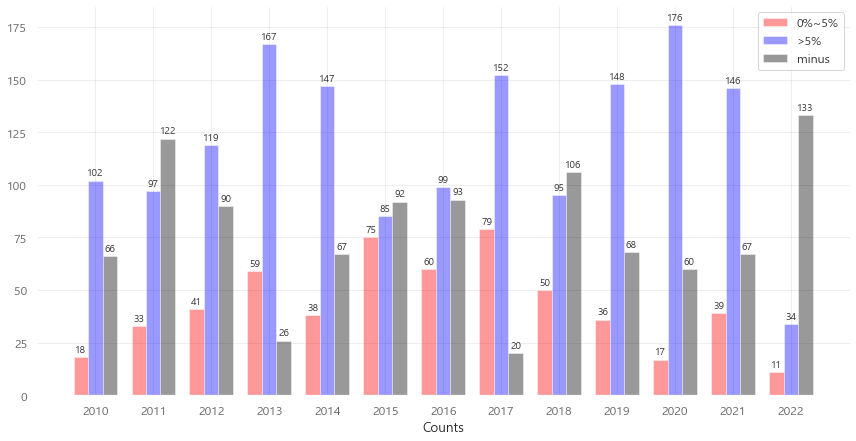

In [52]:
df = df.reset_index()
df['year'] = df['Date'].apply(lambda x:x.year)
df['gubun'] = df['profit'].apply(lambda x: '>5%' if x>0.05 else('0%' if x >= 0.0 else 'N'))

dff = pd.DataFrame(df.groupby(['year', 'gubun']).count()['profit']).reset_index()
dff['year'] = dff['year'].astype(str)

tb = pd.pivot(dff,'year', 'gubun', 'profit')

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
index=np.arange(len(tb))

b1 = plt.bar(index, tb['0%'], bar_width, alpha=0.4, color='red', label='0%~5%')
b2 = plt.bar(index + bar_width, tb['>5%'], bar_width, alpha=0.4, color='blue', label='>5%')
b3 = plt.bar(index + 2 * bar_width, tb['N'], bar_width, alpha=0.4, color='black', label='minus')

plt.xticks(np.arange(bar_width, len(index) + bar_width, 1), tb.index.values)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)

fig.tight_layout()

plt.xlabel('Year')
plt.xlabel('Counts')
plt.legend()
plt.show()